In [1]:
# import the libraries

import pandas as pd # for data manipulation
from collections import Counter # for specialised data types

from sklearn.cluster import KMeans # import k-means algorithm
from sklearn.preprocessing import MinMaxScaler # for scaling the data

# for visualising the data
import matplotlib.pyplot as plt # visualisation library
import seaborn as sns # visualisation library


# import python scripts we created to help with feature engineering

import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.helpers_unsupervised import optimal_number_clusters, visualize_clusters


### Load the Data

In [2]:
# load the news article data

news_articles = pd.read_csv("../data/news_articles_embedded.csv")

news_articles.head()

,news_articles_cleaned,article_length,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,TUFTS UNIVERSITY GUIDE total NUTRITION Stanley...,648,0.063674,0.085297,0.030068,-0.236582,-0.099632,-0.106626,0.103368,0.089685,...,-0.133704,0.205976,0.017928,-0.079413,0.357018,-0.259687,-0.285795,-0.280256,0.243727,-0.041176
1,Sherri agree kiddy sense spew obscenity group ...,1051,0.330090,0.423886,-0.106589,-0.712825,-0.015543,0.140418,0.225684,-0.096341,...,-0.173972,0.097874,0.157118,-0.241851,0.384785,0.421097,-0.118654,-0.219041,0.473751,-0.092789
2,live desolate MidWest far hockey concern sport...,736,0.282579,0.060685,-0.005771,-0.112188,0.141882,-0.115362,0.187903,0.020438,...,-0.018225,0.562516,0.039385,-0.402396,-0.018021,0.140149,0.074238,-0.189758,0.298012,-0.171140
3,watch mirror time turn close night prepare rig...,955,0.357975,0.058069,0.003845,-0.272795,0.177399,0.262043,0.379085,0.020393,...,-0.228673,0.341333,-0.096762,-1.014031,-0.099935,0.098352,-0.263096,-0.709413,0.773608,0.222859
4,know post topic come sciphysicsfusion shortly ...,2015,0.444051,0.202466,-0.097248,-0.611614,-0.060375,-0.183070,0.610924,-0.168412,...,-0.008205,0.428537,0.151059,-0.465667,0.299328,-0.175700,-0.205047,-0.817539,0.453979,0.198110


### Explore the Data

In [3]:
# look at sample article

news_articles.news_articles_cleaned.iloc[100]

'MHO prefer hardcopy book open spread bed desk dorm reference program screen Windows help thing come close good line documentation see generally detailed probably large space compressed premium system fact manual primary reason buy Borland compiler instead lab license lab course get SHELF book help stick destroy set original Microsoft Word Mac word Windows bad batch disk faint idea happen go bad store near magnetic field mistreat give massive headache find work set disk fix machine periodically have work backup godsend sure wish think Murphy Law hold true Newton need think sortof like snake antivenin time absolutely use need BOY need backup original home machine NEAR use abuse lab consider risk usually working copy install eventually use working copy btw notice mention copy program machine machine install wonder licensing upper management non student staff course meticulous check provider software make sure stick license agreement'

In [4]:
# check the shape of the data

news_articles.shape

(1000, 130)

In [5]:
print("# of newspaper articles:", news_articles.shape[0])

# of newspaper articles: 1000


In [6]:
# check the structure of the data 

news_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 130 entries, news_articles_cleaned to 127
dtypes: float64(128), int64(1), object(1)
memory usage: 1015.8+ KB


In [7]:
list(news_articles)

# 0 to 128 repesents the news article as a word embedding vector

['news_articles_cleaned',
 'article_length',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127']

In [8]:
# there is one non numerical dataa type - set the news articles cleaned as index or drop this

news_articles = news_articles.set_index('news_articles_cleaned')


In [9]:
news_articles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, TUFTS UNIVERSITY GUIDE total NUTRITION Stanley Gershoff phd Dean Tufts University School Nutrition HarperPerennial isbn great hazard barbecuing cook use caution burn people suggest barbecue dangerous smoke absorb meat contain benzopyrene pure form know cause cancer laboratory animal order experience result people consume unrealistically large quantity barbecued meat time to true choose plaintext attack DES key determine search willing bet obviously shove arbitrary datum chip key state sesion key exchange external chip pick key bing bing bing bing bing EXACTLY POINT cant know CAPABILITY SAFE ASSUMPTION admit cryptographic complaint probably unfounded not know way gonig word oh come like say evaluate DES box constant
Columns: 129 entries, article_length to 127
dtypes: float64(128), int64(1)
memory usage: 1015.6+ KB


In [10]:
# identify if any missing data exists

news_articles.isnull().sum()

# no missing data

article_length    0
0                 0
1                 0
2                 0
3                 0
                 ..
123               0
124               0
125               0
126               0
127               0
Length: 129, dtype: int64

In [11]:
# check for duplicated data

print("# of duplicated rows of data:", news_articles[news_articles.duplicated(keep = False)].shape[0])

# of duplicated rows of data: 2


In [12]:
# identify duplicated rows of data

news_articles[news_articles.duplicated(keep = False)]

,article_length,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
news_articles_cleaned,,,,,,,,,,,,,,,,,,,,,
current orbital element NORAD line element set carry Celestial BBS update daily possible Documentation tracking software available system service satellite user community current element current shuttle mission provide celestial BBS access hour day bps datum bit stop bit parity element set update daily shuttle element documentation software available anonymous ftp archiveafitafmil directory pub space STS,831,0.084536,0.27991,0.071096,-0.576773,-0.217897,0.242066,0.169721,0.065836,-0.185691,...,0.001128,0.192665,-0.081322,-0.455684,-0.163632,0.051775,0.129985,0.026261,0.391951,-0.161627
current orbital element NORAD line element set carry Celestial BBS update daily possible Documentation tracking software available system service satellite user community current element current shuttle mission provide celestial BBS access hour day bps datum bit stop bit parity element set update daily shuttle element documentation software available anonymous ftp archiveafitafmil directory pub space STS,831,0.084536,0.27991,0.071096,-0.576773,-0.217897,0.242066,0.169721,0.065836,-0.185691,...,0.001128,0.192665,-0.081322,-0.455684,-0.163632,0.051775,0.129985,0.026261,0.391951,-0.161627


In [13]:
# check the summary statistics of the data 

news_articles.describe()

# we need to scale the data since article length is on a different scale and we are working with distance based algorithms

,article_length,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1002.262000,0.218872,0.198230,-0.059384,-0.465432,-0.025746,-0.014422,0.281734,0.019658,-0.163541,...,0.012007,0.185685,0.064457,-0.348206,0.014022,0.131171,-0.130510,-0.277442,0.291931,-0.025943
std,415.189323,0.198304,0.190555,0.150538,0.199234,0.176177,0.187384,0.187300,0.158451,0.144752,...,0.152284,0.160889,0.149425,0.189565,0.172405,0.163108,0.150926,0.223753,0.156319,0.144670
min,500.000000,-1.027267,-0.647517,-0.770045,-1.151299,-0.523842,-0.597156,-0.445386,-0.739178,-0.646027,...,-0.490452,-0.408247,-0.480568,-1.225828,-0.720943,-0.498959,-0.716000,-1.012083,-0.195170,-0.531449
25%,670.500000,0.112102,0.071198,-0.155349,-0.592760,-0.142246,-0.138396,0.154632,-0.079750,-0.252947,...,-0.091742,0.082848,-0.027365,-0.462380,-0.094899,0.028655,-0.223592,-0.416486,0.193015,-0.118713
50%,879.500000,0.225806,0.195005,-0.060008,-0.460023,-0.031594,-0.004801,0.273583,0.015591,-0.154568,...,0.004837,0.186700,0.061399,-0.331285,0.022519,0.133873,-0.136146,-0.279511,0.284212,-0.029021
75%,1240.250000,0.346253,0.314562,0.031274,-0.326154,0.081562,0.110172,0.395800,0.116951,-0.064878,...,0.113485,0.291828,0.153862,-0.220201,0.130636,0.237460,-0.036787,-0.137371,0.389076,0.069945
max,2160.000000,0.914783,0.956133,0.492805,0.061019,1.002261,0.932533,0.903367,0.769105,0.384562,...,0.543387,0.732949,0.825707,0.192545,0.762664,0.657652,0.750303,0.842739,0.933863,0.595685


### Data Cleaning

In [14]:
# data cleaning - drop the duplicated data

print('shape of data before duplicate removal', news_articles.shape)

news_articles_cleaned = news_articles[~news_articles.duplicated(keep = False)]

print('shape of data after duplicate remove', news_articles_cleaned.shape)


shape of data before duplicate removal (1000, 129)
shape of data after duplicate remove (998, 129)


### Identifying Optimal Number of Clusters

In [15]:
# scale the data using MinMax Scaler

min_max_scaler = MinMaxScaler()
news_articles_scaled = min_max_scaler.fit_transform(news_articles_cleaned)

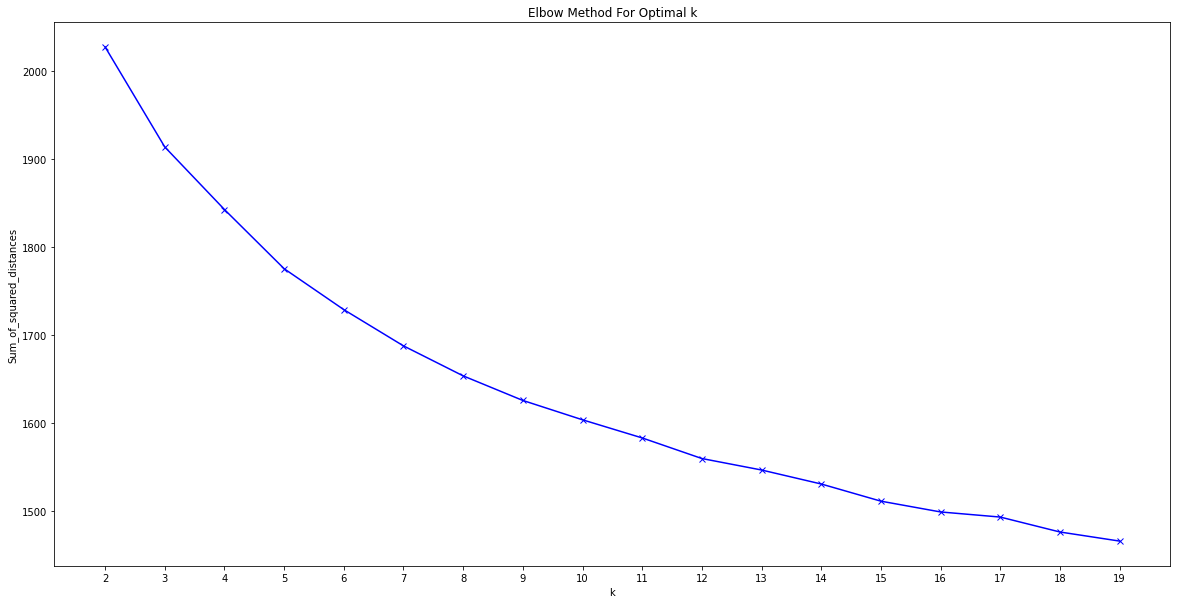

In [16]:
optimal_number_clusters(news_articles_scaled)

### Build the k-means model

In [17]:
# fit a kmeans model based on cluster numbers of your choice
# usually have to scale the data but because we are using word embeddings can skip this

model = KMeans(n_clusters = 6)


In [18]:
# predicted clusters for every newspaper article
labels = model.fit_predict(news_articles_scaled)
labels

array([0, 0, 4, 2, 5, 3, 0, 3, 3, 0, 0, 0, 2, 3, 0, 2, 0, 1, 0, 4, 0, 3,
       0, 2, 2, 5, 3, 2, 1, 3, 3, 4, 3, 0, 2, 0, 2, 4, 5, 3, 2, 0, 1, 3,
       2, 2, 4, 5, 0, 1, 3, 3, 3, 1, 2, 1, 5, 1, 5, 0, 1, 3, 0, 4, 0, 2,
       0, 3, 4, 4, 5, 3, 3, 0, 2, 2, 2, 5, 3, 5, 3, 0, 3, 3, 3, 3, 0, 1,
       0, 0, 3, 5, 1, 3, 2, 5, 3, 5, 3, 5, 5, 3, 1, 3, 5, 3, 0, 3, 0, 1,
       0, 3, 0, 5, 3, 4, 0, 4, 0, 3, 5, 5, 1, 0, 5, 3, 3, 0, 4, 1, 5, 3,
       1, 1, 1, 0, 0, 5, 0, 1, 2, 2, 4, 3, 0, 3, 3, 0, 1, 3, 4, 0, 3, 5,
       0, 2, 3, 4, 0, 0, 2, 5, 2, 3, 2, 0, 3, 3, 3, 4, 0, 1, 1, 0, 3, 2,
       0, 5, 1, 2, 2, 0, 1, 1, 4, 5, 1, 0, 2, 3, 1, 3, 3, 5, 5, 2, 5, 3,
       0, 3, 2, 0, 1, 5, 0, 2, 0, 5, 0, 3, 3, 2, 3, 0, 1, 3, 3, 3, 0, 3,
       1, 5, 3, 1, 3, 3, 4, 1, 5, 4, 2, 2, 3, 0, 0, 3, 5, 2, 2, 5, 0, 1,
       2, 0, 5, 4, 2, 1, 3, 0, 3, 2, 3, 4, 5, 1, 3, 2, 3, 2, 2, 1, 0, 3,
       0, 0, 1, 2, 5, 5, 1, 1, 0, 5, 2, 4, 1, 0, 0, 1, 4, 0, 2, 1, 3, 0,
       5, 0, 1, 5, 4, 0, 2, 0, 2, 2, 4, 0, 5, 1, 1,

In [19]:
# distribution of labels

Counter(labels)

Counter({0: 261, 4: 85, 2: 134, 5: 136, 3: 254, 1: 128})

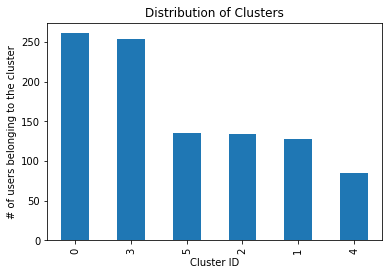

In [20]:
# Distribution of the clusters
# How many users were assigned to eaxh cluster

pd.DataFrame(Counter(labels).most_common()).set_index(0).plot.bar(legend=None)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of users belonging to the cluster');

In [21]:
# the centroids for the clusters

model.cluster_centers_


array([[0.15390758, 0.63781143, 0.54226396, 0.57889304, 0.62548753,
        0.34190004, 0.34819154, 0.54250916, 0.47878637, 0.49979814,
        0.45964619, 0.38516184, 0.59217483, 0.34589734, 0.37185831,
        0.42284967, 0.59665404, 0.41343461, 0.5815963 , 0.53710925,
        0.46734911, 0.49275161, 0.60790749, 0.3755216 , 0.49366125,
        0.44896244, 0.45681832, 0.62549563, 0.39148106, 0.52082458,
        0.50312529, 0.46269772, 0.50196703, 0.69940922, 0.40629528,
        0.74495999, 0.46462608, 0.42142454, 0.54620858, 0.42944763,
        0.49915019, 0.51114117, 0.53527739, 0.64579321, 0.36408667,
        0.43281468, 0.41720057, 0.46427401, 0.46863985, 0.5340585 ,
        0.46018865, 0.51147307, 0.49456269, 0.65315947, 0.38434686,
        0.46570189, 0.36561725, 0.47997075, 0.47334303, 0.45682562,
        0.41213853, 0.47485646, 0.39158745, 0.38252336, 0.55730191,
        0.35673818, 0.40141231, 0.55431455, 0.49691216, 0.5876463 ,
        0.46667125, 0.51903667, 0.50791471, 0.49

### Evaluate the clusters

In [22]:
# create a dataframe that contains the predicted cluster id for every news article

labels_df = pd.DataFrame(labels).reset_index(drop = True).rename(columns = {0: "cluster_id"})
news_articles_w_clusters = pd.concat([news_articles_cleaned.reset_index(), labels_df], axis= 1 ) 
news_articles_w_clusters

,news_articles_cleaned,article_length,0,1,2,3,4,5,6,7,...,119,120,121,122,123,124,125,126,127,cluster_id
0,TUFTS UNIVERSITY GUIDE total NUTRITION Stanley...,648,0.063674,0.085297,0.030068,-0.236582,-0.099632,-0.106626,0.103368,0.089685,...,0.205976,0.017928,-0.079413,0.357018,-0.259687,-0.285795,-0.280256,0.243727,-0.041176,0
1,Sherri agree kiddy sense spew obscenity group ...,1051,0.330090,0.423886,-0.106589,-0.712825,-0.015543,0.140418,0.225684,-0.096341,...,0.097874,0.157118,-0.241851,0.384785,0.421097,-0.118654,-0.219041,0.473751,-0.092789,0
2,live desolate MidWest far hockey concern sport...,736,0.282579,0.060685,-0.005771,-0.112188,0.141882,-0.115362,0.187903,0.020438,...,0.562516,0.039385,-0.402396,-0.018021,0.140149,0.074238,-0.189758,0.298012,-0.171140,4
3,watch mirror time turn close night prepare rig...,955,0.357975,0.058069,0.003845,-0.272795,0.177399,0.262043,0.379085,0.020393,...,0.341333,-0.096762,-1.014031,-0.099935,0.098352,-0.263096,-0.709413,0.773608,0.222859,2
4,know post topic come sciphysicsfusion shortly ...,2015,0.444051,0.202466,-0.097248,-0.611614,-0.060375,-0.183070,0.610924,-0.168412,...,0.428537,0.151059,-0.465667,0.299328,-0.175700,-0.205047,-0.817539,0.453979,0.198110,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,board year work Diskdoubler Autodoubler licens...,967,0.002716,0.225448,-0.011830,-0.677284,0.076164,0.177842,0.335856,0.071763,...,0.189103,-0.003501,-0.382808,0.127223,0.209413,-0.184728,-0.147650,0.224731,0.350194,3
994,Gday anybody point utility read convert crop w...,1005,-0.008636,0.057701,0.011729,-0.586216,-0.303595,-0.141808,0.330478,-0.115949,...,0.401700,0.103060,-0.134279,-0.115085,0.186282,-0.210622,-0.159719,0.190322,-0.076871,3
995,hi think problem stereo sound output Quadra to...,1892,0.103498,0.141640,-0.279338,-0.478848,0.061544,0.052026,0.210216,-0.243906,...,0.104745,0.156637,-0.656079,-0.019547,0.041078,-0.281990,-0.693773,0.564343,-0.081888,5
996,market laser printer printer fine non apple pr...,2153,0.323056,0.418991,-0.194546,-0.658186,-0.263720,0.280623,0.815391,0.240119,...,-0.096766,0.328241,-0.450466,-0.049269,0.217548,-0.359792,-0.572782,0.594978,-0.114764,5


In [23]:
# select a cluster of interest
# what time of news articles appear
# listen to the audio files and check if this makes sense

cluster_news_articles = news_articles_w_clusters[news_articles_w_clusters.cluster_id == 5]
cluster_news_articles.news_articles_cleaned

4      know post topic come sciphysicsfusion shortly ...
25     thing say split bad thing actually like progra...
38     annoyed find guy post private mail response be...
47     apparently instinct brake face danger strong i...
56     ok fact distinct component transmit chip real ...
                             ...                        
961    happen Waco fault BATF proper equipment person...
982    IBM invent DES NBS advertise proposal IBM deci...
985    point raise check actually in chip oppose alle...
995    hi think problem stereo sound output Quadra to...
996    market laser printer printer fine non apple pr...
Name: news_articles_cleaned, Length: 136, dtype: object

In [24]:
# double checck number of articles in the cluster

print("# of articles in the cluster:", cluster_news_articles.shape[0])

# of articles in the cluster: 136


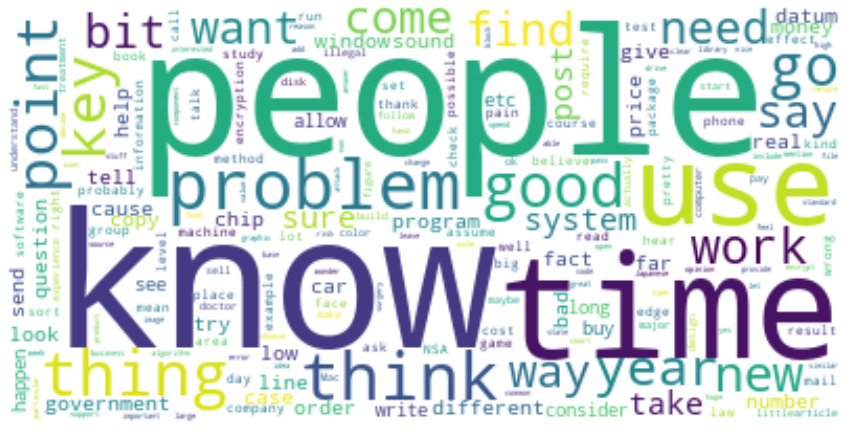

In [25]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

text = " ".join(i for i in cluster_news_articles.news_articles_cleaned)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# look at sample articles

cluster_news_articles.news_articles_cleaned.iloc[100]


'algorithm work Algorithm attempt find outward face normal mark face UNKNOWN create edge dictionary allow find face share give edge edge integer represent share vertex pick arbitrary face mark COUNTERCLOCKWISE edge dictionary orient surround face base orientation face recurse surround face consistently orient entire surface find average vertex surface point calculate volume measurement take account face orientation volume turn positive assume face orient correctly negative reverse orientation mark CLOCKWISE face unknown choose face algorithm end face mark CLOCKWISE index reverse facet normal find note run Silicon Graphics machine buy IRIS Inventor toolkit developer package source algorithm usr src Inventor tool ivnorm sorry source rely heavily Inventor'

In [27]:

cluster_news_articles.news_articles_cleaned.iloc[0]

'know post topic come sciphysicsfusion shortly cold fusion flap start recall experimental mouse show ill effect eventually die reason deuterium exactly reaction rate hydrogen extra mass cause low velocity Boltzman constant mumble throw bit body biochemistry kilter sick die hear poisene way real life process take want write book imagine replace significant fraction water body heavy water wait normal breakdown repair process cause molecule body synthesise deuterium process victim gradually deteriorate eventually die imagine week poisoner ensure significant proportion water victim ingest heavy mess symptom doctor alarm confused organ body suddenly begin deteriorate figure poisoner get heavy water victim hospital real story come think continue heavy water long ingest hospitalisation late detectable effect victim body fluid literally heavy Water molecular weight heavy water mw victim weight increase body water replace heavy water maybe detection occur pathologist lab notice victim urine str

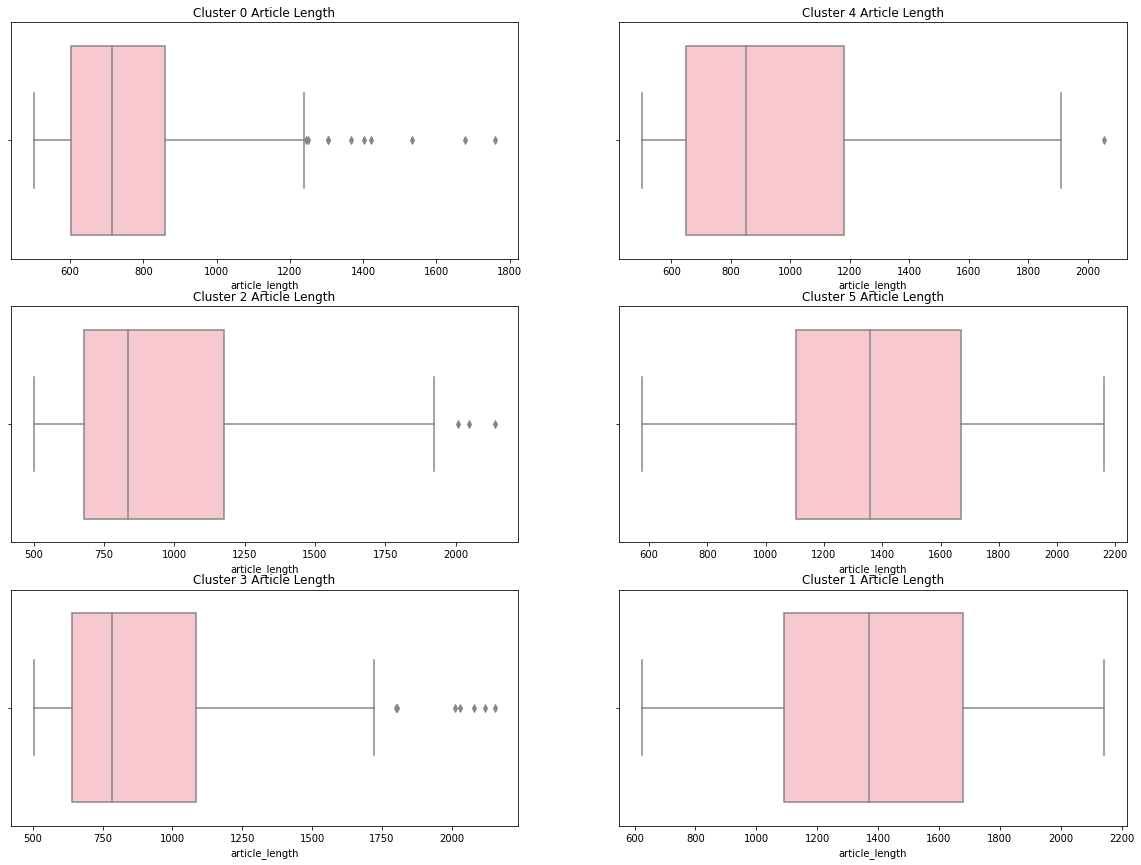

In [28]:
# distribution of article length across all clusters

clusters = news_articles_w_clusters["cluster_id"].unique() 

x = 0
plt.figure(figsize=(20, 20))
for x, c in enumerate(clusters):
    ax = plt.subplot(4, 2, x + 1)
    plt.title(f'Cluster {c} Article Length')
    sns.boxplot(x = news_articles_w_clusters[news_articles_w_clusters["cluster_id"] == c]["article_length"], color='pink')

    
# we are seeing patterns of high energy and low energy clusters

### Visualise the clusters

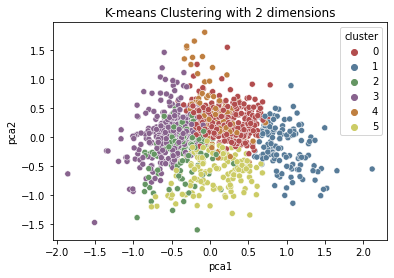

In [29]:
visualize_clusters(labels, news_articles_scaled, n_clusters=6)